# Advanced Regression Assignment

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
 

### The company wants to know:

Which variables are significant in predicting the price of a house, and how well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal  

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import datetime

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df = pd.read_csv("train.csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

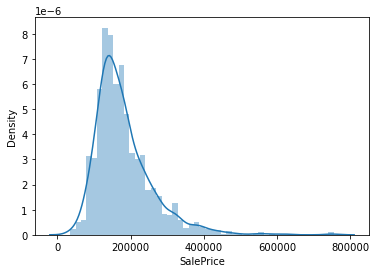

In [3]:
sns.distplot(df['SalePrice'])

In [4]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [5]:
# the column ID can also be realized using index. So we can remove this column
df.drop('Id', axis = 1, inplace = True)
df.shape

(1460, 80)

In [6]:
#percentage of null values (non zero) in differend columns

col_list = list(df)
null = []
for i in df.isnull().sum() * 100 / df.shape[0]:
    null.append(i)
data = {'columns': col_list, '% null': null}
df_null = pd.DataFrame(data)
df_null[df_null['% null'] != 0]

,columns,% null
2,LotFrontage,17.739726
5,Alley,93.767123
24,MasVnrType,0.547945
25,MasVnrArea,0.547945
29,BsmtQual,2.534247
30,BsmtCond,2.534247
31,BsmtExposure,2.602740
32,BsmtFinType1,2.534247
34,BsmtFinType2,2.602740
41,Electrical,0.068493


In [7]:
#'Alley', 'PoolQC', 'Fence', and 'MiscFeature' columns are with very high number of nan values. Let's drop the columns
df_1 = df.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
print('Shape of the orginal df:', df.shape)
print('Shape after dropping:', df_1.shape)

Shape of the orginal df: (1460, 80)
Shape after dropping: (1460, 76)


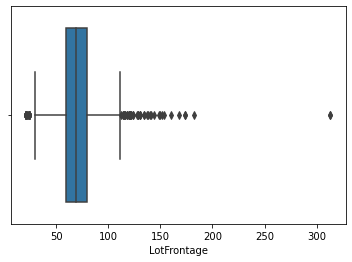

In [8]:
# Checking lotFrontage for outliers
sns.boxplot(df_1.LotFrontage)
plt.show()

In [9]:
# It seems there are outliers with LotFrontage, so we fill missing with median
df_1['LotFrontage'].fillna(df_1['LotFrontage'].median(),inplace=True)

In [10]:
# Checking value counts values for FireplaceQu
df_1['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [11]:
# for garage type, finish and quality, it seems the string NA is treated as missing value, but from data dictionary, it means that fireplace is not present. We replace NA with No.

df_1['GarageType'].fillna('No',inplace=True)
df_1['GarageQual'].fillna('No',inplace=True)
df_1['GarageFinish'].fillna('No',inplace=True)

In [12]:
# Checking value counts values for GarageType
df_1['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
No          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [13]:
# Checking value counts values for GarageQual
df_1['GarageQual'].value_counts()

TA    1311
No      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [14]:
# Checking value counts values for GarageFinish
df_1['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
No      81
Name: GarageFinish, dtype: int64

In [15]:
# for the garage type, finish and quality, it seems the string NA is treated as missing value, but from data dictionary, it means that fireplace is not present. We replace NA with No.

df_1['GarageType'].fillna('No',inplace=True)
df_1['GarageQual'].fillna('No',inplace=True)
df_1['GarageFinish'].fillna('No',inplace=True)

In [16]:
# Recalculating percentage of null values (non zero) in differend columns

col_list = list(df_1)
null = []
for i in df_1.isnull().sum() * 100 / df_1.shape[0]:
    null.append(i)
data = {'columns': col_list, '% null': null}
df_null = pd.DataFrame(data)
df_null[df_null['% null'] != 0]

,columns,% null
23,MasVnrType,0.547945
24,MasVnrArea,0.547945
28,BsmtQual,2.534247
29,BsmtCond,2.534247
30,BsmtExposure,2.602740
31,BsmtFinType1,2.534247
33,BsmtFinType2,2.602740
40,Electrical,0.068493
55,FireplaceQu,47.260274
57,GarageYrBlt,5.547945


In [17]:
df_1.dropna(axis = 0, inplace = True)

In [18]:
df_1.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [19]:
#Checking the no of unique values in each column
df_1.nunique()

MSSubClass        14
MSZoning           4
LotFrontage      101
LotArea          627
Street             2
LotShape           4
LandContour        4
Utilities          2
LotConfig          5
LandSlope          3
Neighborhood      25
Condition1         8
Condition2         5
BldgType           5
HouseStyle         8
OverallQual        8
OverallCond        8
YearBuilt        103
YearRemodAdd      58
RoofStyle          6
RoofMatl           7
Exterior1st       12
Exterior2nd       15
MasVnrType         4
MasVnrArea       265
ExterQual          4
ExterCond          4
Foundation         4
BsmtQual           4
BsmtCond           3
BsmtExposure       4
BsmtFinType1       6
BsmtFinSF1       426
BsmtFinType2       6
BsmtFinSF2        85
BsmtUnfSF        538
TotalBsmtSF      517
Heating            4
HeatingQC          4
CentralAir         2
Electrical         3
1stFlrSF         542
2ndFlrSF         287
LowQualFinSF       8
GrLivArea        581
BsmtFullBath       3
BsmtHalfBath       3
FullBath     

In [20]:
df_1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

There are four columns which gives us details about the years of the construction. Deriving a new column Age of building and dropping the other columns. we take the remodel date because if the house is remodel it means they have made it better so it would not be right to take original date of built

In [21]:
df_1['Age']=df_1['YrSold']-df_1['YearRemodAdd']
df_1['Age'].head()

1    31
2     6
3    36
4     8
6     2
Name: Age, dtype: int64

In [22]:
df_1 = df_1.drop(['YrSold', 'MoSold','YearBuilt','YearRemodAdd'], axis = 1) 

In [23]:
df_1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Age
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,WD,Normal,181500,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,WD,Normal,223500,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,WD,Abnorml,140000,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,WD,Normal,250000,8
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,WD,Normal,307000,2


## Data Analysis

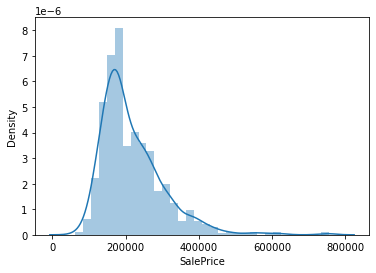

In [24]:
sns.distplot(df_1['SalePrice']);
plt.show()

In [25]:
numeric_feats = df_1.dtypes[df_1.dtypes != "object"].index
numeric_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age'],
      dtype='object')

In [26]:
# List of variables to map
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})

df_1['ExterQual'] = df_1[['ExterQual']].apply(map_function)
df_1['ExterCond'] = df_1[['ExterCond']].apply(map_function)
df_1['BsmtQual'] = df_1[['BsmtQual']].apply(map_function)
df_1['BsmtCond'] = df_1[['BsmtCond']].apply(map_function)
df_1['BsmtExposure'] = df_1[['BsmtExposure']].apply(map_function1)
df_1['BsmtFinType1'] = df_1[['BsmtFinType1']].apply(map_function2)
df_1['BsmtFinType2'] = df_1[['BsmtFinType2']].apply(map_function2)
df_1['HeatingQC'] = df_1[['HeatingQC']].apply(map_function)
df_1['CentralAir'] = df_1[['CentralAir']].apply(map_function3)
df_1['KitchenQual'] = df_1[['KitchenQual']].apply(map_function)
df_1['Functional'] = df_1[['Functional']].apply(map_function4)
df_1['GarageFinish'] = df_1[['GarageFinish']].apply(map_function5)
df_1['GarageQual'] = df_1[['GarageQual']].apply(map_function)
df_1['GarageCond'] = df_1[['GarageCond']].apply(map_function)
df_1['PavedDrive'] = df_1[['PavedDrive']].apply(map_function6)
df_1['FireplaceQu'] = df_1[['FireplaceQu']].apply(map_function)

### Univariate analysis of numerical columns

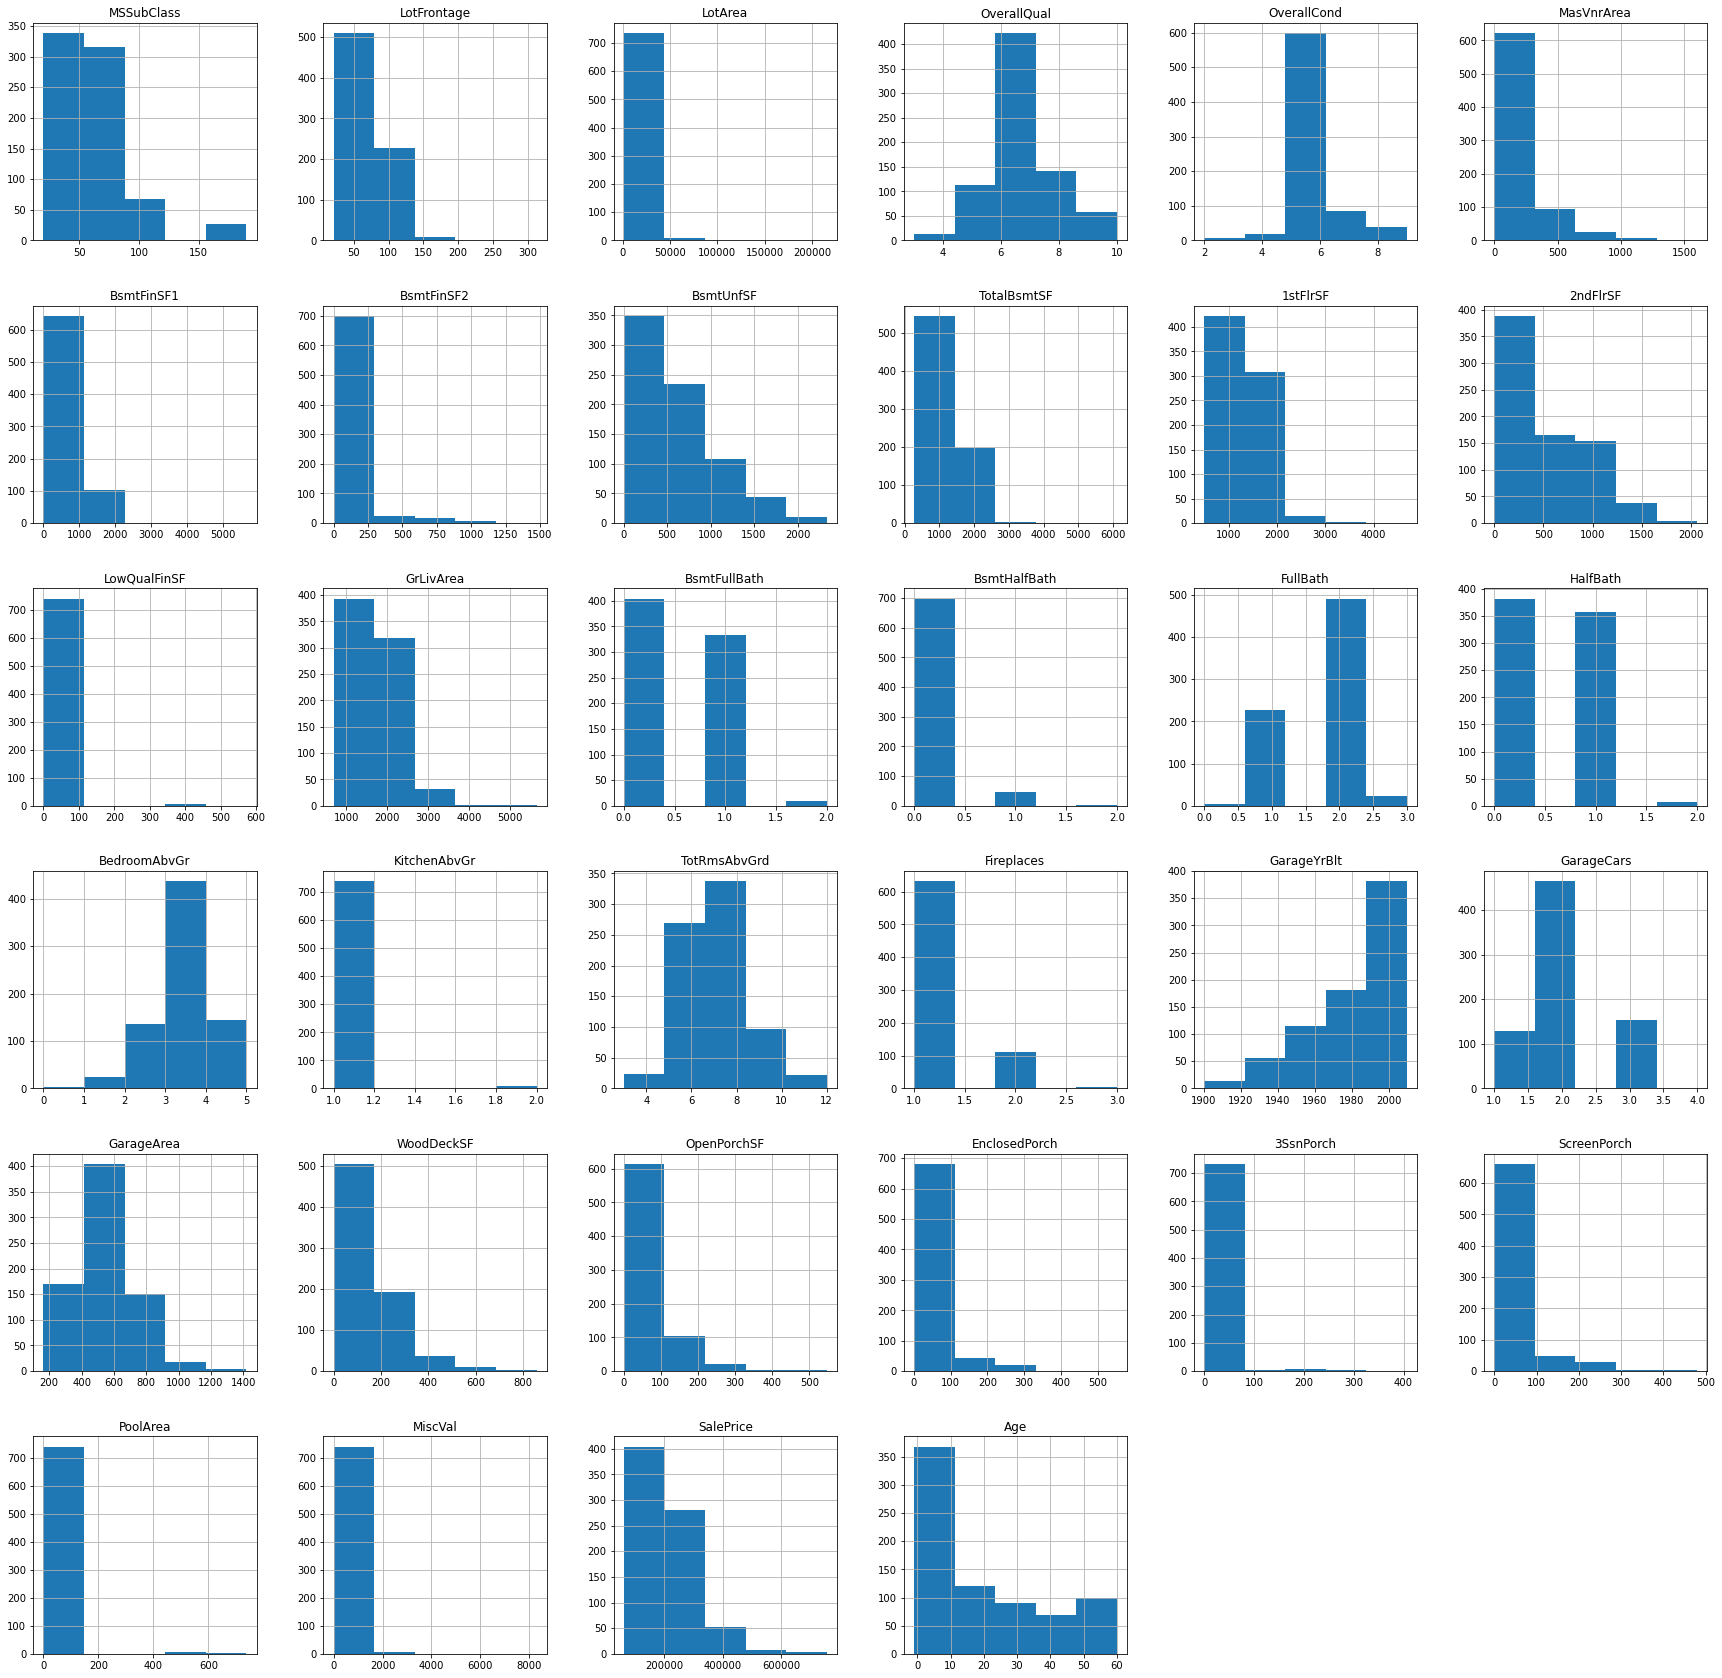

In [27]:
df_1[numeric_feats].hist(bins=5, figsize=(30, 30))
plt.show()

### Correlation Check

In [28]:
corr_matrix = df_1.corr()
corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age
MSSubClass,1.000000,-0.301442,-0.107086,-0.000700,-0.016104,-0.069061,0.007298,-0.018295,0.051545,0.012742,-0.011188,0.037685,-0.089564,-0.018203,-0.078140,-0.133437,-0.272032,0.003726,-0.137297,-0.280431,0.257563,0.031528,0.018055,-0.036989,0.019092,0.051851,0.153854,-0.093343,0.288810,0.001579,-0.032215,0.030699,-0.056782,-0.044916,0.067535,0.009532,-0.042628,-0.094209,0.067586,-0.020729,-0.114624,0.045122,-0.081541,-0.005152,-0.033768,-0.008825,0.016135,0.015623,-0.101498,-0.046168
LotFrontage,-0.301442,1.000000,0.241313,0.221365,-0.049312,0.214547,0.158867,-0.025525,0.152780,0.008680,0.175009,0.085784,0.246622,-0.018802,0.012560,0.037719,0.330829,0.091855,0.070920,0.354857,0.100692,0.061240,0.368343,0.136787,-0.018332,0.156136,0.049169,0.215191,-0.060800,0.168884,0.291591,0.004635,0.125495,0.081940,0.072518,0.148407,0.246411,0.325431,0.035944,0.029989,0.064875,-0.012643,0.166782,0.048519,0.047512,-0.003248,0.212432,-0.022409,0.277675,-0.111888
LotArea,-0.107086,0.241313,1.000000,0.035714,0.025038,0.075208,0.005526,0.007190,0.039027,0.007130,0.256026,0.063035,0.214294,0.110957,0.130314,-0.066764,0.232566,-0.033560,0.022011,0.244986,0.029018,0.022317,0.216404,0.207920,0.028079,0.081416,-0.025701,0.074486,-0.022663,0.020782,0.128936,-0.036484,0.260242,0.036468,-0.058364,0.055558,0.095546,0.136542,0.012027,0.014746,-0.032906,0.143303,0.075610,-0.014264,0.008502,0.007924,0.069444,0.058437,0.204228,0.012254
OverallQual,-0.000700,0.221365,0.035714,1.000000,-0.195700,0.400274,0.725762,-0.066443,0.665587,0.155075,0.269819,0.178635,0.213993,-0.127126,-0.115005,0.296366,0.507688,0.406360,0.090967,0.442334,0.217831,0.023130,0.538309,0.095628,-0.101885,0.498746,0.157080,-0.013098,-0.091128,0.682964,0.427714,0.158368,0.010468,0.347208,0.556129,0.441556,0.618427,0.574488,0.086824,0.109796,0.080466,0.162980,0.258856,-0.093700,0.001649,-0.009094,0.053078,-0.074424,0.760392,-0.548036
OverallCond,-0.016104,-0.049312,0.025038,-0.195700,1.000000,-0.155107,-0.180449,0.400800,-0.330763,0.089631,-0.111404,-0.092465,-0.094140,0.089177,0.026369,-0.117659,-0.219873,-0.129724,-0.021778,-0.109673,0.076674,0.085196,-0.009257,-0.121146,0.081368,-0.144050,-0.036420,0.091946,0.015261,-0.085684,-0.009680,0.021714,0.103843,-0.027381,-0.419863,-0.287558,-0.261771,-0.225102,0.062528,0.019580,-0.133454,-0.034226,-0.010318,0.072150,0.032373,0.057819,0.001505,0.051541,-0.096337,0.080102
MasVnrArea,-0.069061,0.214547,0.075208,0.400274,-0.155107,1.000000,0.352803,-0.030767,0.320709,0.006270,0.175300,0.164648,0.245525,-0.066295,-0.088600,0.108642,0.362310,0.167466,0.091617,0.328443,0.136952,-0.065166,0.371386,0.079629,0.001617,0.239339,0.150826,0.065150,-0.060494,0.280053,0.246153,0.080385,0.035123,0.096924,0.277156,0.231218,0.378443,0.420202,0.014063,0.038132,0.098503,0.127474,0.087113,-0.090321,0.024921,0.021995,-0.006905,-0.033247,0.458147,-0.187650
ExterQual,0.007298,0.158867,0.005526,0.725762,-0.180449,0.352803,1.000000,-0.028264,0.661540,0.138916,0.251527,0.197060,0.193914,-0.075101,-0.086261,0.275226,0.473986,0.531569,0.122653,0.373886,0.120827,-0.020565,0.395134,0.133905,-0.071375,0.421699,0.108395,-0.077320,-0.121700,0.732896,0.313495,0.090289,-0.071372,0.311638,0.613058,0.454757,0.544614,0.504024,0.062824,0.059168,0.131930,0.162965,0.267201,-0.151666,0.039180,-0.032521,0.018573,-0.026050,0.658337,-0.623297
ExterCond,-0.018295,-0.025525,0.007190,-0.066443,0.400800,-0.030767,-0.028264,1.000000,-0.164748,0.073526,-0.030

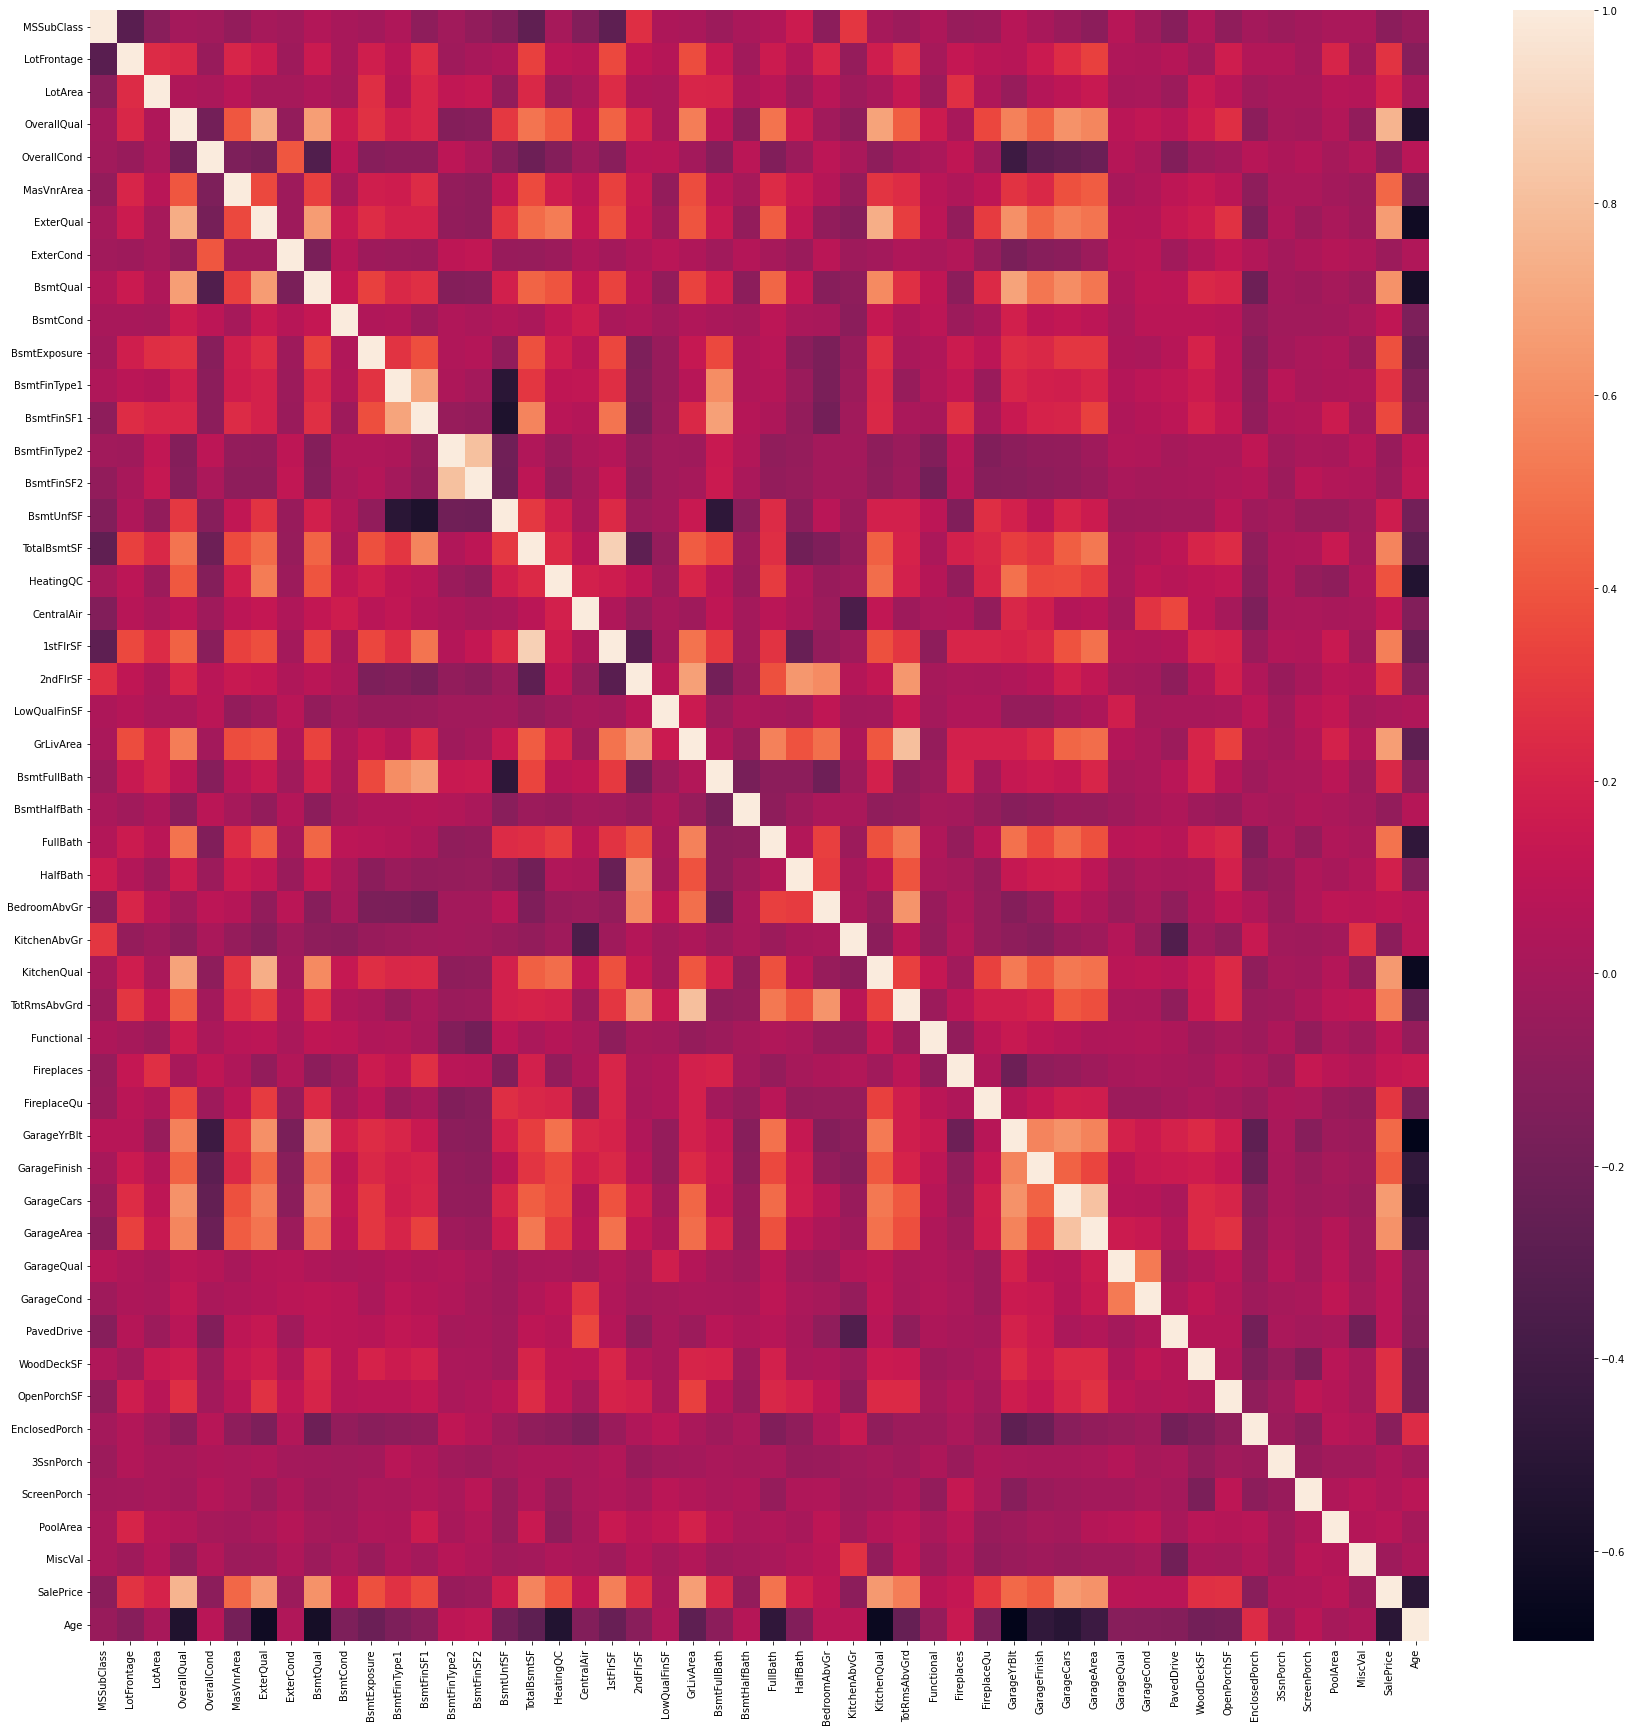

In [29]:
plt.subplots(figsize=(30,30))
sns.heatmap(corr_matrix)
plt.show()

In [30]:
df_1['GarageQual'].value_counts()

3    716
2     16
4     13
5      2
Name: GarageQual, dtype: int64

In [31]:
categorical_feats = df_1.dtypes[df_1.dtypes == "object"].index
categorical_feats

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

## Creating Dummies

In [32]:
dummy = pd.get_dummies(df_1[['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'SaleType', 'SaleCondition']], drop_first=True)
dummy.head(5)

,MSSubClass,MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Electrical_FuseF,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1,20,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,60,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,70,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,60,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6,20,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [33]:
# Adding the results back to the cleaned dataframe
df_1 = pd.concat([df_1, dummy], axis=1)
df_1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Age,MSSubClass,MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Electrical_FuseF,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4,3,4,5,978,1,0,284,1262,GasA,5,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,Attchd,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,WD,Normal,181500,31,20,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,2,6,486,1,0,434,920,GasA,5,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,Attchd,2001.0,2,2,608,3,3,2,0,42,0,0,0,0,0,WD,Normal,223500,6,60,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [34]:
# Dropping the columns whose dummies have been created
df_1 = df_1.drop(['MSSubClass','MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st','Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical','GarageType', 'SaleType', 'SaleCondition'], axis = 1)

In [35]:
df_1.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Electrical_FuseF,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1,80.0,9600,6,8,0.0,3,3,4,3,4,5,978,1,0,284,1262,5,1,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,1976.0,2,2,460,3,3,2,298,0,0,0,0,0,0,181500,31,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,68.0,11250,7,5,162.0,4,3,4,3,2,6,486,1,0,434,920,5,1,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,2001.0,2,2,608,3,3,2,0,42,0,0,0,0,0,223500,6,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,60.0,9550,7,5,0.0,3,3,3,4,1,5,216,1,0,540,756,4,1,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,1998.0,1,3,642,3,3,2,0,35,272,0,0,0,0,140000,36,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,8,5,350.0,4,3,4,3,3,6,655,1,0,490,1145,5,1,1145,1053,0,21

## Data Modeling

In [36]:
#splitting data into test and train

np.random.seed(0)
df_train,df_test = train_test_split(df_1, train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(522, 175)
(225, 175)


In [37]:
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Electrical_FuseF,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
857,65.0,8125,6,5,0.0,3,3,4,3,1,1,0,1,0,702,702,4,1,702,779,0,1481,0,0,2,1,3,1,3,6,8,1,3,1994.0,3,2,343,3,3,2,0,36,0,0,0,0,0,174000,14,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
990,82.0,9452,8,5,423.0,4,3,4,3,1,6,1074,1,0,322,1396,5,1,1407,985,0,2392,1,0,2,1,3,1,4,7,8,1,3,1997.0,3,3,870,3,3,2,0,70,0,0,0,0,0,348000,8,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
119,65.0,8461,6,5,0.0,4,3,4,3,1,1,0,1,0,728,728,5,1,728,728,0,1456,0,0,2,1,3,1,4,8,8,1,4,2005.0,3,2,390,3,3,2,0,24,0,0,0,0,0,163990,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
471,92.0,11952,7,6,0.0,3,3,4,3,1,1,0,1,0,808,808,3,1,1161,808,0,1969,0

In [38]:
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age,MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Electrical_FuseF,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1120,59.0,8263,6,5,0.0,3,3,3,3,1,1,0,1,0,1012,1012,3,1,1012,0,0,1012,0,0,1,0,2,1,3,6,8,1,4,1920.0,1,1,308,3,3,2,0,22,112,0,0,0,0,118400,57,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
222,85.0,11475,6,6,0.0,3,3,4,3,1,5,550,1,0,163,713,3,1,811,741,0,1552,1,0,2,1,3,1,3,6,8,1,3,1975.0,2,2,434,3,3,2,209,208,0,0,0,0,0,179900,31,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
851,69.0,3196,8,5,40.0,4,3,4,3,4,1,0,1,0,1273,1273,5,1,1456,0,0,1456,0,0,2,0,2,1,4,7,8,1,3,2003.0,3,2,400,3,3,2,143,20,0,0,0,0,0,215000,3,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
28,47.0,16321,5,6,0.0,3,3,3,3,4,4,1277,1,0,207,1484,3,1,1600,0

In [39]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

### Scaling data

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_feats = X_train.dtypes[X_train.dtypes != "object"].index
X_train[numeric_feats] = scaler.fit_transform(X_train[numeric_feats])
X_test[numeric_feats] = scaler.transform(X_test[numeric_feats])
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Age,MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Electrical_FuseF,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
857,0.299320,0.043278,0.428571,0.333333,0.000000,0.0,0.333333,0.666667,0.5,0.000000,0.0,0.000000,0.0,0.000000,0.300514,0.149183,0.666667,1.0,0.079781,0.377240,0.0,0.197639,0.0,0.0,0.666667,0.5,0.6,0.0,0.333333,0.333333,1.000000,0.0,0.50,0.843137,1.0,0.333333,0.146003,0.333333,0.5,1.0,0.000000,0.065814,0.0,0.0,0.000,0.0,0.00,0.245902,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
990,0.414966,0.051693,0.714286,0.333333,0.264375,0.5,0.333333,0.666667,0.5,0.000000,1.0,0.475221,0.0,0.000000,0.137842,0.385559,1.000000,1.0,0.336612,0.476998,0.0,0.426419,0.5,0.0,0.666667,0.5,0.6,0.0,0.666667,0.444444,1.000000,0.0,0.50,0.872549,1.0,0.666667,0.575856,0.333333,0.5,1.0,0.000000,0.127971,0.0,0.0,0.000,0.0,0.00,0.147541,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,

In [41]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Age,MSZoning_FV,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNn,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Heating_GasW,Heating_Grav,Heating_OthW,Electrical_FuseF,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
857,0.299320,0.043278,0.428571,0.333333,0.000000,0.0,0.333333,0.666667,0.5,0.000000,0.0,0.000000,0.0,0.000000,0.300514,0.149183,0.666667,1.0,0.079781,0.377240,0.0,0.197639,0.0,0.0,0.666667,0.5,0.6,0.0,0.333333,0.333333,1.000000,0.0,0.50,0.843137,1.0,0.333333,0.146003,0.333333,0.5,1.0,0.000000,0.065814,0.0,0.0,0.000,0.0,0.00,0.245902,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
990,0.414966,0.051693,0.714286,0.333333,0.264375,0.5,0.333333,0.666667,0.5,0.000000,1.0,0.475221,0.0,0.000000,0.137842,0.385559,1.000000,1.0,0.336612,0.476998,0.0,0.426419,0.5,0.0,0.666667,0.5,0.6,0.0,0.666667,0.444444,1.000000,0.0,0.50,0.872549,1.0,0.666667,0.575856,0.333333,0.5,1.0,0.000000,0.127971,0.0,0.0,0.000,0.0,0.00,0.147541,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,

## Data Modeling - Advanced Regression

In [42]:
# Lets assume alpha is 0.001 and build a Ridge regression model
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.9138922708134875


In [43]:
# Performing Cross score validation and using different values of alpha and finding the optimal paramater
# Tune hyperparameter
params = {'alpha':  [0.001,0.01,0.5, 1.0, 10.0, 50, 100,500, 1000]}

# Build model using Ridge regression
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [44]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002316,0.001999,0.004839,0.005219,0.001,{'alpha': 0.001},-25681.349803,-28974.336837,-42000.724023,-32512.106190,-26985.542375,-31230.811846,5857.358531,6,-17334.121528,-17132.550162,-13634.023881,-14655.416031,-17709.997852,-16093.221891,1633.948605
1,0.001796,0.001466,0.004478,0.006015,0.01,{'alpha': 0.01},-25353.696974,-27854.419980,-40561.634261,-32504.110265,-26712.228176,-30597.217931,5532.385186,5,-17355.971032,-17162.649391,-13735.662339,-14669.967109,-17731.073039,-16131.064582,1612.287060
2,0.001197,0.001466,0.000599,0.000798,0.5,{'alpha': 0.5},-24226.116498,-21788.501477,-32509.363409,-31227.424716,-22157.055719,-26381.692364,4574.296428,3,-18087.416926,-18103.287720,-14978.178717,-15849.165884,-18847.631270,-17173.136104,1488.338710
3,0.003124,0.006249,0.000000,0.000000,1.0,{'alpha': 1.0},-23972.558695,-21557.528225,-31976.698661,-30875.032177,-21622.962666,-26000.956085,4527.502415,2,-18664.318736,-18696.936492,-15485.874092,-16520.102328,-19424.790330,-17758.404396,1495.068651
4,0.004121,0.006065,0.005043,0.005730,10.0,{'alpha': 10.0},-22906.638065,-21205.534030,-30868.582146,-31123.777564,-21193.502523,-25459.606865,4564.083149,1,-22002.603612,-21978.621556,-19303.333625,-19866.287239,-22420.615835,-21114.292374,1271.198740
5,0.004631,0.006130,0.001186,0.000969,50,{'alpha': 50},-25328.183604,-25890.406913,-31586.793528,-35845.981723,-26061.125826,-28942.498319,4131.131092,4,-27745.500637,-27542.192086,-25189.800012,-26119.034547,-27326.818319,-26784.669120,977.511213
6,0.004528,0.005684,0.000798,0.000977,100,{'alpha': 100},-29051.087912,-30959.421792,-33966.417347,-40915.421552,-30153.074519,-33009.084625,4276.687947,7,-32341.301434,-32137.377721,-30184.814265,-30758.847230,-31528.964375,-31390.261005,816.539663
7,0.003124,0.006249,0.000000,0.000000,500,{'alpha': 500},-42965.128391,-49709.301017,-47193.031224,-56583.769813,-44412.313796,-48172.708848,4802.630435,8,-48890.159655,-47800.984399,-46667.228493,-45650.073944,-47528.167161,-47307.322730,1091.241587
8,0.000000,0.000000,0.003124,0.006248,1000,{'alpha': 1000},-49547.218288,-57384.202788,-53373.330736,-62365.990896,-51010.893042,-54736.327150,4645.136889,9,-55904.595489,-54308.393802,-53504.447747,-51935.060489,-54512.741709,-54033.047847,1303.041150


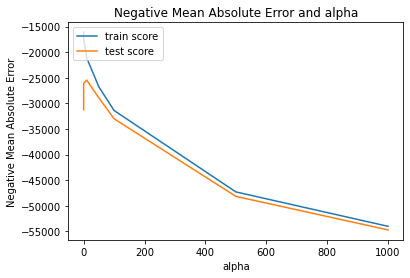

In [45]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

It looks like alpha lies between 0 and 20. So changing the value of alpha.

In [46]:
# list of alphas to tune
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004056,0.002847,0.004780,0.006347,0.001,{'alpha': 0.001},-25681.349803,-28974.336837,-42000.724023,-32512.106190,-26985.542375,-31230.811846,5857.358531,13,-17334.121528,-17132.550162,-13634.023881,-14655.416031,-17709.997852,-16093.221891,1633.948605
1,0.001796,0.001467,0.000997,0.000892,0.01,{'alpha': 0.01},-25353.696974,-27854.419980,-40561.634261,-32504.110265,-26712.228176,-30597.217931,5532.385186,12,-17355.971032,-17162.649391,-13735.662339,-14669.967109,-17731.073039,-16131.064582,1612.287060
2,0.003124,0.006249,0.003124,0.006248,1.0,{'alpha': 1.0},-23972.558695,-21557.528225,-31976.698661,-30875.032177,-21622.962666,-26000.956085,4527.502415,10,-18664.318736,-18696.936492,-15485.874092,-16520.102328,-19424.790330,-17758.404396,1495.068651
3,0.003124,0.006249,0.000000,0.000000,2.0,{'alpha': 2.0},-23576.695004,-21226.939572,-31502.532285,-30726.903092,-21086.945338,-25624.003058,4576.182360,9,-19425.677616,-19495.953993,-16237.399066,-17253.760707,-20128.795051,-18508.317287,1494.918472
4,0.003124,0.006249,0.003124,0.006248,3.0,{'alpha': 3.0},-23345.841102,-21094.325580,-31310.758604,-30740.069553,-20845.963406,-25467.391649,4624.464341,8,-19973.932597,-20000.666990,-16848.968004,-17751.109395,-20610.944606,-19037.124319,1464.567989
5,0.001312,0.002624,0.003785,0.006055,4.0,{'alpha': 4.0},-23125.014091,-20986.234521,-31160.992114,-30737.802362,-20709.365534,-25343.881725,4654.553817,4,-20380.379534,-20390.816050,-17343.312580,-18187.291084,-20966.209435,-19453.601737,1420.009352
6,0.002577,0.002068,0.001396,0.001196,5.0,{'alpha': 5.0},-22956.371703,-20881.840943,-31022.988674,-30760.054944,-20672.913343,-25258.833921,4668.596794,1,-20707.815709,-20707.642723,-17764.207191,-18556.193413,-21278.876981,-19802.947203,1380.325002
7,0.001989,0.001662,0.000997,0.000892,6.0,{'alpha': 6.0},-22870.761179,-20920.054014,-30965.227746,-30813.779651,-20795.379180,-25273.040354,4644.775004,2,-20991.875605,-21001.048719,-18130.621827,-18874.895937,-21560.429273,-20111.774273,1350.468196
8,0.006256,0.007661,0.000000,0.000000,7.0,{'alpha': 7.0},-22855.132783,-20965.340815,-30907.307583,-30880.614622,-20909.375381,-25303.554237,4617.993617,3,-21270.260074,-21264.399515,-18456.267052,-19155.885912,-21810.988095,-20391.560129,1328.231004
9,0.003124,0.006249,0.000000,0.000000,8.0,{'alpha': 8.0},-22854.602613,-21023.513926,-30884.579652,-30965.146090,-20998.636087,-25345.295674,4605.240160,5,-21523.194882,-21503.339401,-18752.537205,-19410.522777,-22033.657659,-20644.650385,1307.034177


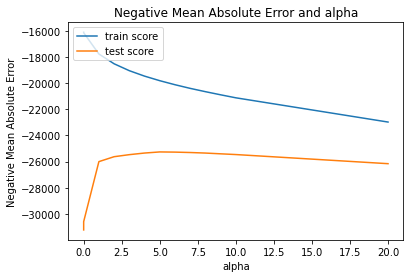

In [48]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

It looks like alpha lies between 0 and 6. So changing the value of alpha.

In [49]:
# list of alphas to tune
params = {'alpha': [0.0001,0.001, 0.01, 0.1, 1.0, 1.1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 1.1, 1.5, 2.0,
                                   2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004337,0.006512,0.000000,0.000000,0.0001,{'alpha': 0.0001},-25729.742390,-29115.211971,-42202.452966,-32522.544867,-27014.069909,-31316.804421,5908.078368,16,-17330.388598,-17131.176687,-13618.129607,-14653.423191,-17707.860334,-16088.195683,1637.923363
1,0.005862,0.005256,0.002574,0.000764,0.001,{'alpha': 0.001},-25681.349803,-28974.336837,-42000.724023,-32512.106190,-26985.542375,-31230.811846,5857.358531,15,-17334.121528,-17132.550162,-13634.023881,-14655.416031,-17709.997852,-16093.221891,1633.948605
2,0.003132,0.006263,0.003124,0.006249,0.01,{'alpha': 0.01},-25353.696974,-27854.419980,-40561.634261,-32504.110265,-26712.228176,-30597.217931,5532.385186,14,-17355.971032,-17162.649391,-13735.662339,-14669.967109,-17731.073039,-16131.064582,1612.287060
3,0.003124,0.006248,0.000000,0.000000,0.1,{'alpha': 0.1},-24995.844112,-23836.067858,-35361.299436,-32100.189142,-24838.357174,-28226.351545,4628.247490,13,-17496.373185,-17398.120336,-14194.005675,-14864.884071,-18009.171712,-16392.510996,1549.866021
4,0.003124,0.006249,0.000000,0.000000,1.0,{'alpha': 1.0},-23972.558695,-21557.528225,-31976.698661,-30875.032177,-21622.962666,-26000.956085,4527.502415,12,-18664.318736,-18696.936492,-15485.874092,-16520.102328,-19424.790330,-17758.404396,1495.068651
5,0.003124,0.006249,0.000751,0.001502,1.1,{'alpha': 1.1},-23921.660445,-21520.109953,-31907.319456,-30822.543074,-21556.107494,-25945.548085,4522.733920,11,-18757.402410,-18795.440911,-15572.231608,-16619.872317,-19510.133517,-17851.016153,1494.972826
6,0.003390,0.000482,0.001899,0.000190,1.5,{'alpha': 1.5},-23725.944342,-21369.805202,-31704.691297,-30746.834544,-21335.990409,-25776.653159,4542.896442,10,-19084.386792,-19154.737256,-15885.792944,-16941.644836,-19808.335000,-18174.979366,1497.750751
7,0.002393,0.000798,0.001795,0.000977,2.0,{'alpha': 2.0},-23576.695004,-21226.939572,-31502.532285,-30726.903092,-21086.945338,-25624.003058,4576.182360,9,-19425.677616,-19495.953993,-16237.399066,-17253.760707,-20128.795051,-18508.317287,1494.918472
8,0.003132,0.006263,0.003124,0.006249,2.5,{'alpha': 2.5},-23453.030972,-21158.469702,-31387.786223,-30735.839515,-20959.275897,-25538.880462,4598.469887,8,-19718.326384,-19764.111603,-16563.704456,-17513.133423,-20391.905373,-18790.236248,1480.781141
9,0.005571,0.005749,0.003124,0.006248,3.0,{'alpha': 3.0},-23345.841102,-21094.325580,-31310.758604,-30740.069553,-20845.963406,-25467.391649,4624.464341,7,-19973.932597,-20000.666990,-16848.968004,-17751.109395,-20610.944606,-19037.124319,1464.567989


In [51]:
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge(alpha=5.5)
 The best r2 score is obtained at alpha 5.5


### Building ridge regression model with optimal alpha value

In [52]:
ridge = Ridge(alpha = 5.5)
ridge.fit(X_train,y_train)

#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(100)

,Features,Coefficient,Mod
3,OverallCond,58245.665125,58245.665125
22,BsmtFullBath,52689.762496,52689.762496
0,LotFrontage,-47464.174549,47464.174549
20,LowQualFinSF,44464.047821,44464.047821
19,2ndFlrSF,42484.769290,42484.769290
99,Condition2_RRAe,-35342.280064,35342.280064
16,HeatingQC,34951.777148,34951.777148
87,Neighborhood_Timber,34778.054096,34778.054096
12,BsmtFinType2,33116.952005,33116.952005
4,MasVnrArea,33074.942035,33074.942035


In [53]:
# Prediction using ridge regression
ridge = Ridge(alpha = 5.5)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.8807305091166511


In [54]:
# Prediction using ridge regression
ridge = Ridge(alpha = 5.5)
ridge.fit(X_test,y_test)

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8481407641673959


### Lasso Regression model

In [55]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [56]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(50)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043864,8.190802e-03,0.000798,0.000977,0.0001,{'alpha': 0.0001},-24928.214092,-28420.580309,-41595.504272,-32616.529786,-28338.153614,-31179.796415,5750.159334,27,-17376.374460,-17129.968265,-13657.524557,-14656.758749,-17707.902599,-16105.705726,1632.408403
1,0.040615,7.652923e-03,0.000000,0.000000,0.001,{'alpha': 0.001},-24930.180214,-28414.162830,-41594.472791,-32616.487195,-28333.979355,-31177.856477,5750.385241,26,-17376.353347,-17129.961839,-13657.562526,-14656.750604,-17707.919051,-16105.709474,1632.397597
2,0.040615,7.653059e-03,0.003124,0.006249,0.01,{'alpha': 0.01},-24949.842130,-28349.988050,-41584.158301,-32616.061587,-28296.909436,-31159.391901,5752.263994,25,-17376.184605,-17129.946791,-13658.024608,-14656.803697,-17708.106500,-16105.813240,1632.258219
3,0.034367,6.248331e-03,0.006249,0.007653,0.05,{'alpha': 0.05},-25037.233568,-28254.525385,-41538.324396,-32614.079978,-28140.720897,-31116.976845,5742.139126,24,-17375.794084,-17130.150130,-13660.216135,-14657.244561,-17708.941637,-16106.469309,1631.651453
4,0.051088,6.042609e-03,0.000000,0.000000,0.1,{'alpha': 0.1},-25147.313149,-28292.081570,-41481.048361,-32611.348356,-27946.741741,-31095.706636,5715.105792,23,-17375.473716,-17130.430421,-13663.827947,-14657.815340,-17709.985141,-16107.506513,1630.657618
5,0.043102,5.534141e-03,0.000399,0.000798,0.2,{'alpha': 0.2},-25364.308436,-28366.934792,-41375.909815,-32603.554815,-27551.608465,-31052.463265,5671.024361,22,-17375.033731,-17130.981008,-13671.462792,-14659.012837,-17712.015430,-16109.701160,1628.557215
6,0.040600,7.640342e-03,0.003124,0.006249,0.3,{'alpha': 0.3},-25499.311843,-28442.080647,-41271.514991,-32598.935730,-27208.023700,-31003.973382,5643.405756,21,-17373.565271,-17133.086967,-13679.215269,-14660.876973,-17713.240082,-16111.996912,1626.181719
7,0.037526,7.695951e-03,0.000000,0.000000,0.4,{'alpha': 0.4},-25487.934570,-28516.811190,-41179.585941,-32593.055472,-27132.136360,-30981.904706,5615.507449,20,-17372.629266,-17135.096697,-13686.968546,-14662.585247,-17713.685758,-16114.193103,1623.752869
8,0.035867,6.218789e-03,0.003327,0.006160,0.5,{'alpha': 0.5},-25489.704203,-28591.452152,-41092.873138,-32587.106223,-27058.548515,-30963.936846,5587.092158,19,-17372.010586,-17137.380117,-13694.743291,-14664.290165,-17714.724283,-16116.629689,1621.520446
9,0.035868,6.219106e-03,0.000000,0.000000,0.6,{'alpha': 0.6},-25489.200538,-28666.081281,-41004.055158,-32581.087186,-26990.388152,-30946.162463,5558.048909,18,-17371.218177,-17139.668028,-13702.774511,-14665.990867,-17716.205313,-16119.171379,1619.275110


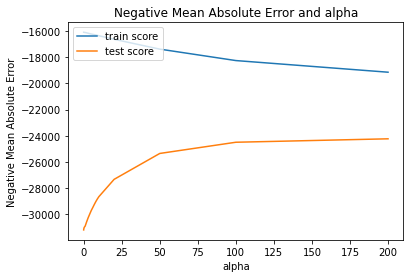

In [57]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [58]:
# list of alphas to tune
params = {'alpha': [100, 200, 300, 400, 500, 1000]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [100, 200, 300, 400, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(50)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010802,0.004540,0.004105,0.004159,100,{'alpha': 100},-22097.202788,-20578.083464,-31078.742057,-29408.645968,-19308.108182,-24494.156492,4805.935621,3,-19087.741753,-19162.079109,-16477.524820,-16705.612653,-19894.284786,-18265.448624,1397.353158
1,0.003723,0.006061,0.003131,0.006263,200,{'alpha': 200},-21766.953807,-20526.556046,-30580.519196,-28839.764976,-19448.033204,-24232.365446,4565.704750,1,-19985.607993,-19922.366169,-17619.254627,-17645.049535,-20594.164488,-19153.288562,1263.994028
2,0.000000,0.000000,0.006248,0.007652,300,{'alpha': 300},-22318.238003,-20519.425705,-30449.114404,-28769.489155,-19899.038558,-24391.061165,4366.579091,2,-20689.639227,-20501.880238,-18526.591439,-18565.724541,-21254.231089,-19907.613307,1138.945481
3,0.000000,0.000000,0.006249,0.007653,400,{'alpha': 400},-22696.108297,-20836.361169,-29951.779469,-28910.286011,-20386.869050,-24556.280799,4068.188919,4,-21332.113219,-21061.738027,-19353.620482,-19394.010280,-21953.445562,-20618.985514,1057.078760
4,0.003938,0.001768,0.001803,0.000987,500,{'alpha': 500},-22965.130815,-20909.717691,-29677.646442,-29059.596345,-20385.681312,-24599.554521,3993.042818,5,-21911.971680,-21535.183172,-20210.196851,-20253.646829,-22511.218779,-21284.443462,914.132072
5,0.004129,0.005880,0.000399,0.000798,1000,{'alpha': 1000},-24641.704635,-22000.450372,-29397.803343,-31130.199686,-21573.830025,-25748.797612,3872.488795,6,-24261.688201,-24043.919152,-22713.550465,-23909.351464,-24336.391786,-23852.980214,589.688819


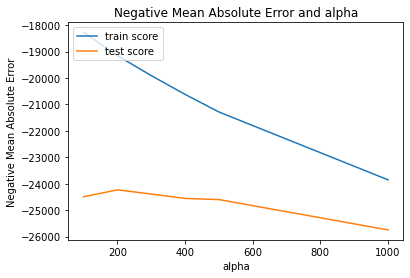

In [60]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [61]:
# list of alphas to tune
params = {'alpha': [200, 250, 300, 350, 400, 450, 500]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [200, 250, 300, 350, 400, 450, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(50)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007373,0.005493,0.001396,0.001197,200,{'alpha': 200},-21766.953807,-20526.556046,-30580.519196,-28839.764976,-19448.033204,-24232.365446,4565.704750,1,-19985.607993,-19922.366169,-17619.254627,-17645.049535,-20594.164488,-19153.288562,1263.994028
1,0.007851,0.006644,0.000399,0.000798,250,{'alpha': 250},-22036.739810,-20463.407665,-30539.497638,-28715.719200,-19634.187963,-24277.910455,4473.009199,2,-20323.611103,-20181.996877,-18093.116539,-18063.321499,-20900.625425,-19512.534289,1195.641018
2,0.006249,0.007653,0.003124,0.006248,300,{'alpha': 300},-22318.238003,-20519.425705,-30449.114404,-28769.489155,-19899.038558,-24391.061165,4366.579091,3,-20689.639227,-20501.880238,-18526.591439,-18565.724541,-21254.231089,-19907.613307,1138.945481
3,0.001356,0.002713,0.000211,0.000422,350,{'alpha': 350},-22564.919259,-20659.261025,-30221.735439,-28835.431126,-20190.742221,-24494.417814,4209.503050,4,-21029.647228,-20829.266493,-18936.925438,-19020.090921,-21626.556761,-20288.497368,1101.611446
4,0.004910,0.000510,0.001795,0.000399,400,{'alpha': 400},-22696.108297,-20836.361169,-29951.779469,-28910.286011,-20386.869050,-24556.280799,4068.188919,5,-21332.113219,-21061.738027,-19353.620482,-19394.010280,-21953.445562,-20618.985514,1057.078760
5,0.000000,0.000000,0.006249,0.007653,450,{'alpha': 450},-22866.877319,-20904.003673,-29772.084731,-28988.928073,-20381.639355,-24582.706630,4011.740879,6,-21628.890293,-21295.501103,-19783.076683,-19814.455376,-22255.003547,-20955.385400,993.410681
6,0.009373,0.007653,0.000000,0.000000,500,{'alpha': 500},-22965.130815,-20909.717691,-29677.646442,-29059.596345,-20385.681312,-24599.554521,3993.042818,7,-21911.971680,-21535.183172,-20210.196851,-20253.646829,-22511.218779,-21284.443462,914.132072


In [63]:
# list of alphas to tune
params = {'alpha': [150, 160, 170, 180, 190, 200, 210, 220, 230]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [150, 160, 170, 180, 190, 200, 210, 220,
                                   230]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(50)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006184,0.005932,0.001197,0.001163,150,{'alpha': 150},-21853.586925,-20626.741682,-30760.937553,-29058.082164,-19189.595818,-24297.788828,4689.926012,9,-19686.828791,-19639.776250,-17112.393404,-17188.444260,-20321.633292,-18789.815199,1360.269577
1,0.007850,0.006993,0.000399,0.000798,160,{'alpha': 160},-21830.596494,-20621.596196,-30727.187244,-29015.945709,-19213.163480,-24281.697825,4670.154579,8,-19753.513268,-19701.653374,-17226.432830,-17292.518586,-20377.641959,-18870.352003,1336.786246
2,0.009373,0.007653,0.000000,0.000000,170,{'alpha': 170},-21818.429821,-20602.774574,-30694.114882,-28983.878730,-19256.198629,-24271.079327,4649.448177,7,-19812.405052,-19760.352528,-17334.160474,-17395.037635,-20428.934331,-18946.178004,1312.740092
3,0.008606,0.006802,0.001505,0.002029,180,{'alpha': 180},-21799.209269,-20574.773912,-30641.816024,-28944.508474,-19325.528482,-24257.167232,4618.604698,6,-19864.928198,-19812.489547,-17431.778596,-17496.741825,-20484.011310,-19017.989895,1290.582423
4,0.008834,0.006869,0.001206,0.001177,190,{'alpha': 190},-21774.357575,-20546.976548,-30606.163551,-28888.479217,-19390.189413,-24241.233261,4590.748682,4,-19921.890761,-19868.900760,-17524.496776,-17573.936109,-20539.188097,-19085.682501,1276.560350
5,0.004626,0.006220,0.000000,0.000000,200,{'alpha': 200},-21766.953807,-20526.556046,-30580.519196,-28839.764976,-19448.033204,-24232.365446,4565.704750,1,-19985.607993,-19922.366169,-17619.254627,-17645.049535,-20594.164488,-19153.288562,1263.994028
6,0.006249,0.007653,0.003124,0.006248,210,{'alpha': 210},-21812.468203,-20506.491212,-30556.103582,-28792.206479,-19497.012867,-24232.856468,4537.475478,2,-20044.598713,-19966.074105,-17716.490409,-17724.908912,-20647.862365,-19219.986901,1246.693145
7,0.003124,0.006248,0.003124,0.006249,220,{'alpha': 220},-21864.459626,-20492.566573,-30538.468103,-28745.393910,-19541.338553,-24236.445353,4510.722344,3,-20113.141409,-20014.062459,-17816.028565,-17809.214062,-20707.314959,-19291.952291,1230.927264
8,0.006249,0.007653,0.003124,0.006248,230,{'alpha': 230},-21917.340344,-20477.543973,-30534.892629,-28727.215019,-19577.981457,-24246.994684,4495.459205,5,-20182.025358,-20071.136683,-17915.668826,-17890.295700,-20770.413850,-19365.908083,1217.920937


In [65]:
model_cv.best_params_

{'alpha': 200}

We can see the rank 1 is for alpha = 200

In [66]:
# Train data r2 score

lasso = Lasso(alpha = 200)        
lasso.fit(X_train, y_train) 

y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.889519897854063

In [67]:
# Test data r2 score

lasso = Lasso(alpha = 200)
lasso.fit(X_test, y_test)

y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.8810601591870558

In [68]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

lasso_coef

,Feature,Coef,mod
0,LotFrontage,16638.227883,16638.227883
1,LotArea,-10368.154162,10368.154162
2,OverallQual,49636.474509,49636.474509
3,OverallCond,112140.397217,112140.397217
4,MasVnrArea,-0.000000,0.000000
5,ExterQual,0.000000,0.000000
6,ExterCond,24070.777970,24070.777970
7,BsmtQual,-0.000000,0.000000
8,BsmtCond,12826.130311,12826.130311
9,BsmtExposure,-0.000000,0.000000


In [69]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
3,OverallCond,112140.397217,112140.397217
30,Functional,102698.675794,102698.675794
46,MiscVal,-100075.255879,100075.255879
36,GarageArea,50667.804351,50667.804351
2,OverallQual,49636.474509,49636.474509
80,Neighborhood_NridgHt,40971.465519,40971.465519
72,Neighborhood_Gilbert,-38384.334518,38384.334518
71,Neighborhood_Edwards,33256.404919,33256.404919
104,HouseStyle_1.5Unf,-28039.520189,28039.520189
81,Neighborhood_OldTown,27561.173764,27561.173764


## Conclusion

- OverallCond plays a very important role in sales price calculation. The better the overall condition, the higher the sales price.
- functional also has a very high positive influence on the sales price.
- MiscVal has a very high negative impact on sales price.
- Neighbourhood plays a very important role in deciding the sales price.

### Q1. Doubling the alpha for Ridge and Lasso.

For Ridge:

In [70]:
# choosing alpha as 11.0

# Prediction using ridge regression
ridge = Ridge(alpha = 11.0)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.861873815078007


In [71]:
# Prediction using ridge regression
ridge = Ridge(alpha = 11.0)
ridge.fit(X_test,y_test)

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8080169764430424


We can see slight reduction in r2 score for Ridge when alpha is doubled.

In [72]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(100)

,Features,Coefficient,Mod
0,LotFrontage,81737.494271,81737.494271
3,OverallCond,30941.006027,30941.006027
36,GarageArea,28143.207121,28143.207121
6,ExterCond,26717.625586,26717.625586
30,Functional,23898.474413,23898.474413
29,TotRmsAbvGrd,23283.077314,23283.077314
10,BsmtFinType1,21832.045134,21832.045134
104,HouseStyle_1.5Unf,-21780.083789,21780.083789
72,Neighborhood_Gilbert,-21700.384290,21700.384290
81,Neighborhood_OldTown,21560.015649,21560.015649


For Lasso:

In [73]:
# choosing alpha as 400.0

lasso = Lasso(alpha = 400)        
lasso.fit(X_train, y_train) 

y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.8655220953781475

In [74]:
lasso = Lasso(alpha = 400)
lasso.fit(X_test, y_test)

y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.8379818957407074

For Lasso, the r2 score reduces slightly when the alpha score is doubled.

In [75]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

lasso_coef

,Feature,Coef,mod
0,LotFrontage,46472.022349,46472.022349
1,LotArea,-11978.239411,11978.239411
2,OverallQual,24591.162454,24591.162454
3,OverallCond,107552.607060,107552.607060
4,MasVnrArea,-0.000000,0.000000
5,ExterQual,0.000000,0.000000
6,ExterCond,28772.842783,28772.842783
7,BsmtQual,-0.000000,0.000000
8,BsmtCond,11467.463668,11467.463668
9,BsmtExposure,-0.000000,0.000000


In [76]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
3,OverallCond,107552.607060,107552.607060
30,Functional,86919.567329,86919.567329
36,GarageArea,56100.132907,56100.132907
0,LotFrontage,46472.022349,46472.022349
72,Neighborhood_Gilbert,-38449.704040,38449.704040
80,Neighborhood_NridgHt,31314.652310,31314.652310
6,ExterCond,28772.842783,28772.842783
81,Neighborhood_OldTown,27033.541666,27033.541666
71,Neighborhood_Edwards,25645.953132,25645.953132
2,OverallQual,24591.162454,24591.162454


### Q3. Remove 5 most important predictor variables from Lasso and rebuild the model.

In [77]:
X_train.drop('OverallCond', axis = 1, inplace = True)
X_train.drop('Functional', axis = 1, inplace = True)
X_train.drop('MiscVal', axis = 1, inplace = True)
X_train.drop('GarageArea', axis = 1, inplace = True)
X_train.drop('OverallQual', axis = 1, inplace = True)

In [78]:
X_test.drop('OverallCond', axis = 1, inplace = True)
X_test.drop('Functional', axis = 1, inplace = True)
X_test.drop('MiscVal', axis = 1, inplace = True)
X_test.drop('GarageArea', axis = 1, inplace = True)
X_test.drop('OverallQual', axis = 1, inplace = True)

In [79]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 200]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(50)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.046432,1.434463e-02,0.000792,0.000970,0.0001,{'alpha': 0.0001},-29125.406217,-32382.062355,-41796.494271,-34507.026645,-28408.494933,-33243.896884,4813.070849,24,-18712.044946,-18306.693706,-15473.741994,-16497.571247,-19435.282841,-17685.066947,1469.997510
1,0.040616,7.653164e-03,0.000000,0.000000,0.001,{'alpha': 0.001},-29127.615036,-32375.652862,-41795.875899,-34507.069820,-28408.173585,-33242.877440,4812.770294,23,-18712.006425,-18306.692176,-15473.749190,-16497.556937,-19435.297458,-17685.060437,1469.995626
2,0.040645,7.678075e-03,0.003124,0.006248,0.01,{'alpha': 0.01},-29149.702885,-32311.557938,-41789.692119,-34507.500688,-28404.960151,-33232.682756,4809.858025,19,-18711.696922,-18306.734976,-15473.901023,-16497.531190,-19435.469786,-17685.066779,1469.955527
3,0.040693,7.717813e-03,0.000000,0.000000,0.05,{'alpha': 0.05},-29247.867786,-32086.005746,-41762.188720,-34509.203149,-28390.366262,-33199.126333,4796.206703,16,-18710.511535,-18306.992534,-15474.762336,-16497.672336,-19436.184831,-17685.224714,1469.700255
4,0.035954,6.288913e-03,0.003124,0.006248,0.1,{'alpha': 0.1},-29370.564087,-32120.369992,-41727.229967,-34511.301335,-28372.071543,-33220.307385,4765.924332,17,-18709.186164,-18307.165202,-15476.822595,-16497.897318,-19437.094190,-17685.633094,1469.090815
5,0.036822,1.129454e-02,0.003529,0.006110,0.2,{'alpha': 0.2},-29503.785228,-32194.435781,-41656.457931,-34515.257851,-28340.388867,-33242.065132,4722.747505,22,-18705.342010,-18308.190575,-15480.979676,-16498.659662,-19439.153140,-17686.465013,1467.761275
6,0.037468,7.671761e-03,0.003124,0.006249,0.3,{'alpha': 0.3},-29602.652069,-32269.328397,-41587.087854,-34516.863416,-28305.081126,-33256.202573,4686.765853,27,-18702.805892,-18309.091353,-15484.915578,-16499.500423,-19440.955364,-17687.453722,1466.598016
7,0.034367,6.248426e-03,0.003124,0.006248,0.4,{'alpha': 0.4},-29628.425769,-32343.720986,-41517.765121,-34518.399888,-28264.462336,-33254.554820,4663.848239,26,-18699.019324,-18309.864462,-15488.925457,-16500.517585,-19442.914649,-17688.248295,1465.240181
8,0.034422,6.364657e-03,0.003127,0.006253,0.5,{'alpha': 0.5},-29629.661052,-32410.993747,-41448.434386,-34522.470137,-28224.973420,-33247.306549,4645.323414,25,-18695.831091,-18310.794175,-15492.976769,-16501.763127,-19444.962226,-17689.265477,1463.952817
9,0.034367,6.248474e-03,0.000000,0.000000,0.6,{'alpha': 0.6},-29632.145735,-32474.295460,-41388.397597,-34524.005913,-28187.698149,-33241.308571,4629.767075,21,-18692.707155,-18311.878106,-15495.906092,-16503.363925,-19447.121096,-17690.195275,1462.995668


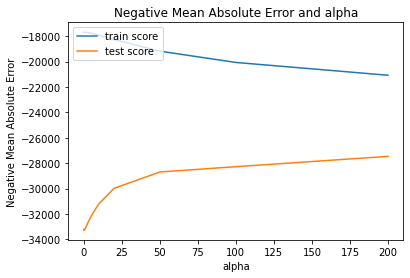

In [81]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [82]:
# list of alphas to tune
params = {'alpha': [100, 200, 300, 400, 500, 1000]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [100, 200, 300, 400, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(50)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010332,0.005576,0.003405,0.005350,100,{'alpha': 100},-28069.499693,-24280.735889,-32644.532849,-33078.056589,-23302.026677,-28274.970340,4071.584698,6,-20608.976686,-20754.023695,-18349.230971,-18795.377301,-21812.514548,-20064.024640,1294.625180
1,0.006256,0.007661,0.003124,0.006249,200,{'alpha': 200},-26932.335969,-23420.058457,-31424.562641,-31924.961809,-23610.054516,-27462.394679,3662.656125,5,-21572.698865,-21612.944420,-19765.248810,-19868.299397,-22543.378376,-21072.513974,1083.029735
2,0.003124,0.006249,0.003124,0.006249,300,{'alpha': 300},-25909.582963,-23455.982704,-31202.624252,-31236.216143,-23770.788369,-27115.038886,3455.959599,3,-22347.060656,-22307.324488,-20747.763028,-20710.128661,-23212.251037,-21864.905574,982.350752
3,0.007654,0.005386,0.004319,0.005739,400,{'alpha': 400},-25646.969643,-23587.033954,-30673.390492,-30931.151467,-23949.427816,-26957.594674,3216.326399,2,-23085.665099,-22956.906316,-21484.018821,-21464.911368,-23723.514328,-22543.003186,910.289422
4,0.005373,0.005332,0.000798,0.000977,500,{'alpha': 500},-25437.187759,-23606.871262,-30315.464221,-30766.149389,-23753.284371,-26775.791400,3143.937145,1,-23616.038129,-23418.351408,-22287.746523,-22238.516085,-24066.697466,-23125.469922,734.957635
5,0.000000,0.000000,0.003124,0.006248,1000,{'alpha': 1000},-25922.045849,-24660.510500,-30248.183040,-32001.976904,-23214.971034,-27209.537466,3355.967128,4,-25247.956343,-25052.551282,-24267.094856,-25267.234510,-25407.819892,-25048.531377,406.779746


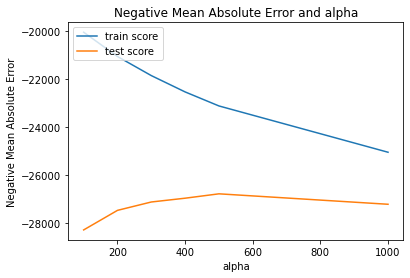

In [84]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [85]:
model_cv.best_params_

{'alpha': 500}

We can see the rank 1 is for alpha = 500

In [86]:
# Train data r2 score

lasso = Lasso(alpha = 500)        
lasso.fit(X_train, y_train) 

y_train_pred=lasso.predict(X_train)
r2_score(y_train,y_train_pred)

0.8371096183626675

In [87]:
# Test data r2 score

lasso = Lasso(alpha = 500)
lasso.fit(X_test, y_test)

y_test_pred=lasso.predict(X_test)
r2_score(y_test,y_test_pred)

0.8113165757042746

In [88]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

lasso_coef

,Feature,Coef,mod
0,LotFrontage,79743.696119,79743.696119
1,LotArea,-4967.787472,4967.787472
2,MasVnrArea,9717.816906,9717.816906
3,ExterQual,0.000000,0.000000
4,ExterCond,41242.357405,41242.357405
5,BsmtQual,-0.000000,0.000000
6,BsmtCond,28313.603229,28313.603229
7,BsmtExposure,0.000000,0.000000
8,BsmtFinType1,26190.770293,26190.770293
9,BsmtFinSF1,18052.299751,18052.299751


In [89]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
28,Fireplaces,82300.688651,82300.688651
0,LotFrontage,79743.696119,79743.696119
33,GarageQual,68209.441770,68209.441770
4,ExterCond,41242.357405,41242.357405
27,TotRmsAbvGrd,37677.612151,37677.612151
76,Neighborhood_OldTown,36339.460013,36339.460013
67,Neighborhood_Gilbert,-31811.938411,31811.938411
75,Neighborhood_NridgHt,31739.731189,31739.731189
66,Neighborhood_Edwards,31323.875411,31323.875411
6,BsmtCond,28313.603229,28313.603229


Remove the top five predictor variables reduced the r2 score.